In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math as m

In [20]:
def fuzzify(x, member):
    
    if (member == 'small'):
        c = 0
    elif (member == 'medium'):
        c = m.pi
    elif (member == 'big'):
        c = 2*m.pi
    
    if (type(x) == np.ndarray):
        y = []
        for value in x:
            y.append( m.exp( -1.0*(value-c)**2 / (2*(m.pi/2)**2) ) )
        return y
    else:
        return m.exp( -1.0*(x-c)**2 / (2*(m.pi/2)**2) )
    

In [8]:
def f(x, member):
    if (member == 'small'):
        return x
    elif (member == 'medium'):
        return -x+m.pi
    elif (member == 'big'):
        return x-2*m.pi

In [45]:
def takagi_sugeno(x, members, scale = 1):
    
    if (type(x) == np.ndarray):
        y = []
        for value in x:
            
            numerator = 0
            denominator = 0
            for member in members:
                numerator = numerator + fuzzify(value, member)*f(value, member)
                denominator = denominator + fuzzify(value, member)

            if (denominator == 0):
                denominator = 1
                
            y.append(numerator / (denominator*scale))
            
        return y
    else:
        numerator = 0
        denominator = 0
        for member in members:
            numerator = numerator + fuzzify(x, member)*f(x, member)
            denominator = denominator + fuzzify(x, member)

        if (denominator == 0):
            denominator = 1
        
        return numerator/denominator

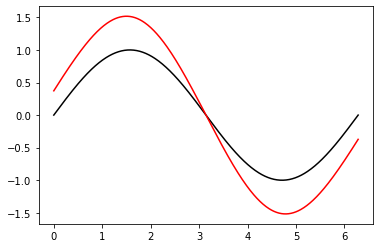

In [46]:
x = np.linspace(0, 2*m.pi, num=500)
members = ['small', 'medium', 'big']

plt.plot(x, np.vectorize(m.sin)(x), color = 'black')
# plt.plot(x, fuzzify(x, members[0]), color='red')
# plt.plot(x, fuzzify(x, members[1]), color='blue')
# plt.plot(x, fuzzify(x, members[2]), color='orange')
plt.plot(x, takagi_sugeno(x, members, max(np.vectorize(m.sin)(x))), color = 'red')
plt.show()

In [18]:
type(x) == np.ndarray

True